In [38]:
import geopandas as gpd
from shapely.geometry import Point  
import matplotlib.pyplot as plt 

vm_map = gpd.read_file('./Census tract - Percentage of visible minority/Census tract - Percentage of visible minority, n.i.e..shp')

vm_map.rename(columns={'Value': 'Percentage of visible minority'}, inplace=True)

In [39]:
from shapely.geometry import box
import geodatasets
import mapclassify

toronto = gpd.read_file('./toronto_neighbourhoods/neighbourhood.shp')
toronto_proj = toronto.to_crs(epsg=2958)
vm_map_proj = vm_map.to_crs(epsg=2958)

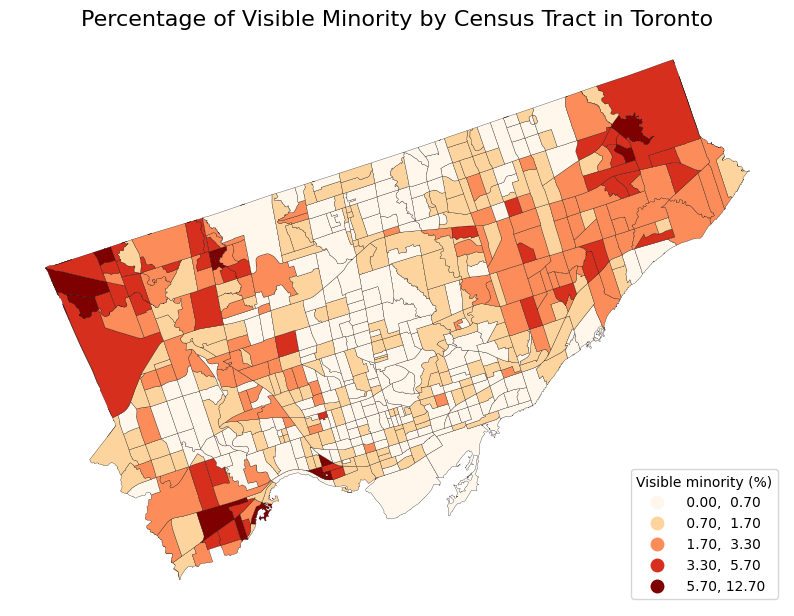

In [40]:
to_ct = gpd.clip(vm_map_proj, toronto_proj)

fig, ax = plt.subplots(figsize=(10, 10))

map = to_ct.plot(column='Percentage of visible minority', 
            scheme = 'naturalbreaks', 
            cmap='OrRd', legend=True, 
            legend_kwds = {'loc': 4, 'title': 'Visible minority (%)'}, 
            ax=ax, edgecolor='black', linewidth=0.2)
map.set_title("Percentage of Visible Minority by Census Tract in Toronto", fontsize=16)
map.set_axis_off()

In [19]:
mmhh_map = gpd.read_file('./Census tract - Median total income of households in 2020 ($)/Census tract - Median total income of households in 2020 ($).shp')
mmhh_map.rename(columns={'Value': 'Median total income of households in 2020 ($)'}, inplace=True)

In [32]:
hor_map = gpd.read_file('./Census tract - Homeownership rate (%)/Census tract - Homeownership rate (%).shp')
hor_map.rename(columns={'Value': 'Homeownership rate (%)'}, inplace=True)

In [36]:
mmhh_to = gpd.clip(mmhh_map.to_crs(epsg=2958), toronto_proj)
hor_to = gpd.clip(hor_map.to_crs(epsg=2958), toronto_proj)

vm_mmhh_ct = to_ct.merge(mmhh_to, how = 'left').iloc[:, [0,1,3,2,5,4]]
vm_hor_ct = to_ct.merge(hor_to, how = 'left').iloc[:, [0,1,3,2,5,4]]
mmhh_hor_ct = mmhh_to.merge(hor_to, how = 'left').iloc[:, [0,1,3,2,5,4]]


In [ ]:
# do we want bivariate maps of the above gdfs ? 
# its a bit of work to set up the colour schemes but its doable
# i don't wanna start this unless we're sure to use them for the report or the presentation
# lmk by tuesday afternoon ig? im working at my intership during the day so I'll probably finish the maps later that night
